In [1]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle

neutrino direction

In [2]:
neutrino_file = "/storage/gpfs_data/neutrino/SAND/LBNF-GSIMPLE-FILES/gsimple_subdetectors/antineutrino/gsimple_DUNE_ND_NEAR_FID1_g4lbne_v3r5p4_QGSP_BERT_OptimizedEngineeredNov2017_antineutrino_00001_00000.root"

In [3]:
nu_df = upr.open(neutrino_file)['flux'].arrays(['numi/pdpx',
 'numi/pdpy',
 'numi/pdpz',],library='pd')
nu_df

,numi/pdpx,numi/pdpy,numi/pdpz
0,-0.012350,-0.017859,4.777512
1,-0.229915,0.067256,14.847130
2,-0.005111,-0.006261,2.885187
3,-0.020953,0.007657,7.377622
4,0.028439,-0.042842,3.023819
...,...,...,...
20464,0.017609,-0.111621,32.860740
20465,-0.116549,-0.001936,8.944135
20466,0.062106,0.005701,6.235008
20467,-0.066288,0.049728,11.553174


functions

In [12]:
def get_mass_from_pdgid(pdgid):
    try:
        particle_info = particle.Particle.from_pdgid(pdgid)
        if particle_info is not None:
            return particle_info.mass * 1e-3  # Convert mass to GeV
        else:
            return np.NaN
    except Exception as e:
        print(f"Error occurred for PDG ID {pdgid}: {e}")
        return np.NaN

def rimappa_subentry(valore):
    mappa = {0: 'neutrino', 1: 'nucleon target'}
    return mappa.get(valore, valore)

In [5]:
tree = upr.open("/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/events-in-SANDtracker.0.gtrac.analysed.root")['gtrac_extended']

In [6]:
tree.keys()

['EvtNum',
 'NeutrinoFlavor',
 'isCCEvent',
 'EventType',
 'InteractionTargetPDG',
 'CCQEonHydrogen',
 'Interaction_vtxX',
 'Interaction_vtxY',
 'Interaction_vtxZ',
 'isInFiducialVolume',
 'InteractionTarget',
 'InteractionTargetFromGEO',
 'InteractionVolume',
 'InitialStatePDG',
 'InitialStateNames',
 'InitialStateMomenta',
 'InitialStateTotal4Momentum',
 'InitialStateEmissionAngle',
 'FinalStateLeptonPDG',
 'FinalStateLeptonNames',
 'FinalStateLepton4Momentum',
 'FinalStateLeptonEmissionAngle',
 'PrimaryStateHadronicSystemPDG',
 'PrimaryStateHadronicSystemNames',
 'PrimaryStateHadronicSystemMomenta',
 'PrimaryStateHadronicSystemTotal4Momentum',
 'PrimaryStateHadronicSystemEmissionAngle',
 'PrimaryStateHadronicSystemTotalKinE',
 'PrimaryStateHadronicSystemTopology_code',
 'PrimaryStateHadronicSystemTopology_name',
 'FinalStateHadronicSystemPDG',
 'FinalStateHadronicSystemNames',
 'FinalStateHadronicSystemMomenta',
 'FinalStateHadronicSystemTotal4Momentum',
 'FinalStateHadronicSystemEm

# Event Information

In [7]:
new_columns = {
    ('EventType', '', ''): 'EventType',
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('InitialStateNames', '', ''): 'InitialStateParticlesNames',
    ('InitialStateTotal4Momentum', 'fP', 'fX'): 'InitialState_Px',
    ('InitialStateTotal4Momentum', 'fP', 'fY'): 'InitialState_Py',
    ('InitialStateTotal4Momentum', 'fP', 'fZ'): 'InitialState_Pz',
    ('InitialStateTotal4Momentum', 'fE', ''): 'InitialState_E',
    ('InitialStateEmissionAngle', 'fE', ''): 'InitialState_EmissionAngle',
    ('PrimaryStateHadronicSystemTotal4Momentum', 'fP', 'fX'): 'PrimaryHadronic_Px',
    ('PrimaryStateHadronicSystemTotal4Momentum', 'fP', 'fY'): 'PrimaryHadronic_Py',
    ('PrimaryStateHadronicSystemTotal4Momentum', 'fP', 'fZ'): 'PrimaryHadronic_Pz',
    ('PrimaryStateHadronicSystemTotal4Momentum', 'fE', ''): 'PrimaryHadronic_E',
    ('PrimaryStateHadronicSystemTotalKinE', '', ''): 'PrimaryHadronic_KinE',
    ('FinalStateHadronicSystemTotal4Momentum', 'fP', 'fX'): 'FinalHadronic_Px',
    ('FinalStateHadronicSystemTotal4Momentum', 'fP', 'fY'): 'FinalHadronic_Py',
    ('FinalStateHadronicSystemTotal4Momentum', 'fP', 'fZ'): 'FinalHadronic_Pz',
    ('FinalStateHadronicSystemTotal4Momentum', 'fE', ''): 'FinalHadronic_E',
    ('FinalStateHadronicSystemTotal4Momentum', 'fE', ''): 'FinalHadronic_E',
    ('FinalStateHadronicSystemEmissionAngle', '', ''): 'FinalStateHadronicSystemEmissionAngle',
    ('NuclearTotal4Momentum', 'fP', 'fX'): 'NuclearRemnant_Px',
    ('NuclearTotal4Momentum', 'fP', 'fY'): 'NuclearRemnant_Py',
    ('NuclearTotal4Momentum', 'fP', 'fZ'): 'NuclearRemnant_Pz',
    ('NuclearTotal4Momentum', 'fE', ''): 'NuclearRemnant_E',
    # checks energy momentum conservation
    ('PrimaryStateTotal4Momantum', 'fP', 'fX'): 'PrimaryState_Px',
    ('PrimaryStateTotal4Momantum', 'fP', 'fY'): 'PrimaryState_Py',
    ('PrimaryStateTotal4Momantum', 'fP', 'fZ'): 'PrimaryState_Pz',
    ('PrimaryStateTotal4Momantum', 'fE', ''): 'PrimaryState_E',
    ('FinalStateTotal4Momantum', 'fP', 'fX'): 'FinalState_Px',
    ('FinalStateTotal4Momantum', 'fP', 'fY'): 'FinalState_Py',
    ('FinalStateTotal4Momantum', 'fP', 'fZ'): 'FinalState_Pz',
    ('FinalStateTotal4Momantum', 'fE', ''): 'FinalState_E',
}

df = tree.arrays([
                  'EvtNum',
                  'InteractionTarget',
                  'InteractionTargetFromGEO',
                  'EventType',
                  'CCQEonHydrogen',
                  'InteractionVolume',
                  'Interaction_vtxX',
                  'Interaction_vtxY',
                  'Interaction_vtxZ',
                  'InitialStateTotal4Momentum',
                  'InitialStateEmissionAngle',
                  'PrimaryStateHadronicSystemTotal4Momentum',
                  'FinalStateHadronicSystemEmissionAngle',
                  'PrimaryStateHadronicSystemTotalKinE',
                  'FinalStateHadronicSystemTotal4Momentum',
                  'FinalStateHadronicSystemTotalKinE',
                  'NuclearTotal4Momentum',
                  'PrimaryStateHadronicSystemTopology_name',
                  'FinalStateHadronicSystemTopology_name',
                  'PrimaryStateTotal4Momantum',
                  'FinalStateTotal4Momantum'
                  ], library='pd')

# Appiattire il MultiIndex delle colonne
df.columns = ['_'.join(filter(None, col)).strip() for col in df.columns.values]

# Creare un dizionario di mappatura per le nuove colonne appiattite
flat_new_columns = {'_'.join(filter(None, k)).strip(): v for k, v in new_columns.items()}

# Rinomina le colonne usando il dizionario di mappatura
df.rename(columns=flat_new_columns, inplace=True)                  

# df = df.rename(columns=new_columns)
df['Nucleo_target'] =  ["COH" if len(i) == 1 else i[1] for i in tree.arrays(['InitialStateNames'], library='np')['InitialStateNames']]
df["InitialState_Ptot"] = np.sqrt(df['InitialState_Px']**2 + df['InitialState_Py']**2 + df['InitialState_Pz']**2)
df["PrimaryState_Ptot"] = np.sqrt(df['PrimaryState_Px']**2 + df['PrimaryState_Py']**2 + df['PrimaryState_Pz']**2)
df["FinalState_Ptot"] = np.sqrt(df['FinalState_Px']**2 + df['FinalState_Py']**2 + df['FinalState_Pz']**2)

df

,EvtNum,NuclearTarget,InteractionTargetFromGEO,EventType,CCQEonHydrogen,InteractionVolume,Interaction_vtxX,Interaction_vtxY,Interaction_vtxZ,InitialState_Px,...,PrimaryState_Pz,PrimaryState_E,FinalState_Px,FinalState_Py,FinalState_Pz,FinalState_E,Nucleo_target,InitialState_Ptot,PrimaryState_Ptot,FinalState_Ptot
0,3,C12,Graphite,RES,0,CTarget_B,0.543455,-3.210264,24.348786,-0.125120,...,7.710924,8.812631,0.002342,-0.807463,7.850872,19.067150,proton,7.761433,7.761433,7.892287
1,4,C12,C3H6,DIS,0,C3H6Target_A,1.383373,-2.739792,24.263772,0.044125,...,2.899975,3.995286,0.009199,-0.312431,3.058490,14.249283,proton,2.923887,2.923887,3.074420
2,7,C12,Graphite,RES,0,CTarget_B,-1.395769,-3.751119,24.349695,-0.076818,...,3.303209,4.123761,-0.014603,-0.327758,3.185989,14.377700,proton,3.311640,3.311640,3.202837
3,9,proton,C3H6,DIS,0,C3H6Target_B,-0.475896,-4.051112,24.593424,-0.007777,...,3.783350,4.742225,-0.007777,-0.395293,3.783350,4.742225,proton,3.803953,3.803953,3.803953
4,10,C12,C3H6,DIS,0,C3H6Target_C,0.708860,-1.763741,23.133073,-0.019918,...,3.060436,4.134228,0.004023,-0.325031,3.197965,14.389305,neutron,3.083030,3.083030,3.214442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378748,987,C12,C3H6,DIS,0,C3H6Target_A,-1.393631,-0.779037,23.896994,-0.061461,...,2.496240,3.467867,-0.006623,-0.246691,2.534781,13.721628,proton,2.527187,2.527187,2.546765
378749,993,proton,C3H6,QES,1,C3H6Target_A,1.067293,-1.641857,24.020758,0.008995,...,2.765768,3.718147,0.008995,-0.279552,2.765768,3.718147,proton,2.779875,2.779875,2.779875
378750,994,C12,C3H6,DIS,0,C3H6Target_A,-0.264632,-3.494409,23.689337,-0.189418,...,10.868372,11.741870,-0.007448,-1.101657,10.767043,21.998121,neutron,10.930746,10.930746,10.823258
378751,998,C12,C3H6,DIS,0,C3H6Target_A,-0.791038,-2.111652,24.262608,-0.163151,...,3.868537,4.808445,-0.000325,-0.383505,3.869948,15.063767,neutron,3.889591,3.889591,3.888904


In [8]:
l=[]
for i in tree.arrays(['InitialStateNames'],library='np')['InitialStateNames']:
    if(len(i)==1):
        l.append("COH")
    else:
        l.append(i[1])

In [9]:
len(l)

378753

<AxesSubplot:xlabel='EventType', ylabel='Count'>

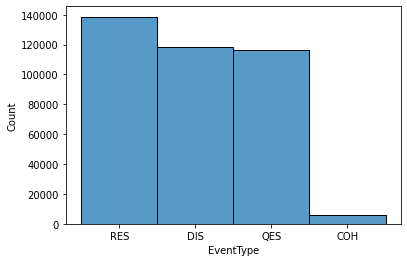

In [10]:
sns.histplot(df.EventType)

# Inital State

In [13]:
new_columns = {
    ('EvtNum', '', ''): 'EvtNum',
    ('EventType', '', ''): 'EventType',
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('InitialStateMomenta', 'fP', 'fX'): 'Px',
    ('InitialStateMomenta', 'fP', 'fY'): 'Py',
    ('InitialStateMomenta', 'fP', 'fZ'): 'Pz',
    ('InitialStateMomenta', 'fE', ''): 'E',
    ('InitialStateEmissionAngle', '', ''): 'EmissionAngle',
}

InitialState = tree.arrays(['EvtNum',
                            'EventType',
                            'InteractionTarget',
                            'CCQEonHydrogen',
                            'InitialStateMomenta',
                            'InitialStateEmissionAngle',
                            ], library='pd').rename(columns=new_columns)

InitialState["name"] = [item for sublist in tree.arrays(['InitialStateNames'], library='np')['InitialStateNames'] for item in sublist]

InitialState = InitialState.set_index(['EvtNum',
                                       'EventType',
                                       'NuclearTarget',
                                       'CCQEonHydrogen',
                                       'name'
                                        ], append=True).reorder_levels(['EvtNum',
                                                                        'entry',
                                                                        'EventType',
                                                                        'NuclearTarget', 
                                                                        'CCQEonHydrogen',
                                                                        'subentry',
                                                                        'name'
                                                                        ])

new_index = InitialState.index.to_frame()
new_index['subentry'] = new_index['subentry'].map(rimappa_subentry)
InitialState.index = pd.MultiIndex.from_frame(new_index)

InitialState['Ptot'] = np.sqrt(InitialState['Px']**2 + InitialState['Py']**2 + InitialState['Pz']**2)
InitialState

Px  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
3      0      RES       C12           0              neutrino       nu_mu_bar  0.002342   
                                                     nucleon target proton    -0.127462   
4      1      DIS       C12           0              neutrino       nu_mu_bar  0.009199   
                                                     nucleon target proton     0.034926   
7      2      RES       C12           0              neutrino       nu_mu_bar -0.014603   
...                                                                                 ...   
994    378750 DIS       C12           0              nucleon target neutron   -0.181969   
998    378751 DIS       C12           0              neutrino       nu_mu_bar -0.000325   
                                                     nucleon target neutron   -0.162827   
999    378752 RES       C12           0              neutrino       nu_mu_bar -0.004650   
                                                     nucleon target neutron   -0.047650   

                                                                                     Py  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
3      0      RES       C12           0              neutrino       nu_mu_bar -0.807463   
                                                     nucleon target proton    -0.067656   
4      1      DIS       C12           0              neutrino       nu_mu_bar -0.312431   
                                                     nucleon target proton    -0.058122   
7      2      RES       C12           0              neutrino       nu_mu_bar -0.327758   
...                                                                                 ...   
994    378750 DIS       C12           0              nucleon target neutron   -0.048920   
998    378751 DIS       C12           0              neutrino       nu_mu_bar -0.383505   
                                                     nucleon target neutron    0.013755   
999    378752 RES       C12           0              neutrino       nu_mu_bar -0.134949   
                                                     nucleon target neutron    0.046805   

                                                                                     Pz  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
3      0      RES       C12           0              neutrino       nu_mu_bar  7.850872   
                                                     nucleon target proton    -0.139947   
4      1      DIS       C12           0              neutrino       nu_mu_bar  3.058490   
                                                     nucleon target proton    -0.158514   
7      2      RES       C12           0              neutrino       nu_mu_bar  3.185989   
...                                                                                 ...   
994    378750 DIS       C12           0              nucleon target neutron    0.101329   
998    378751 DIS       C12           0              neutrino       nu_mu_bar  3.869948   
                                                     nucleon target neutron   -0.001410   
999    378752 RES       C12           0              neutrino       nu_mu_bar  1.376360   
                                                     nucleon target neutron   -0.072748   

                                                                                      E  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
3      0      RES       C12           0              neutrino       nu_mu_bar  7.892287   
                                                     nucleon target proton     0.920345   
4      1      DIS       C12           0              neutrino       nu_mu_bar  3.074420   
                                                     nucleon target proton    

In [14]:
nucleon_target = InitialState.loc[(slice(None), slice(None), slice(None), slice(None), slice(None),"nucleon target"),:]
incoming_neutrino = InitialState.loc[(slice(None), slice(None), slice(None), slice(None), slice(None),"neutrino"),:]

In [15]:
InitialState_ccqe_H = InitialState.loc[(slice(None),slice(None),slice(None),slice(None),1,slice(None)),:]
InitialState_ccqe_H

Px  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
53     27     QES       proton        1              neutrino       nu_mu_bar  0.000961   
                                                     nucleon target proton     0.000000   
152    64     QES       proton        1              neutrino       nu_mu_bar -0.002373   
                                                     nucleon target proton     0.000000   
249    103    QES       proton        1              neutrino       nu_mu_bar -0.004538   
...                                                                                 ...   
949    378734 QES       proton        1              nucleon target proton     0.000000   
958    378737 QES       proton        1              neutrino       nu_mu_bar -0.009082   
                                                     nucleon target proton     0.000000   
993    378749 QES       proton        1              neutrino       nu_mu_bar  0.008995   
                                                     nucleon target proton     0.000000   

                                                                                     Py  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
53     27     QES       proton        1              neutrino       nu_mu_bar -0.124413   
                                                     nucleon target proton     0.000000   
152    64     QES       proton        1              neutrino       nu_mu_bar -0.294813   
                                                     nucleon target proton     0.000000   
249    103    QES       proton        1              neutrino       nu_mu_bar -0.157301   
...                                                                                 ...   
949    378734 QES       proton        1              nucleon target proton     0.000000   
958    378737 QES       proton        1              neutrino       nu_mu_bar -0.278873   
                                                     nucleon target proton     0.000000   
993    378749 QES       proton        1              neutrino       nu_mu_bar -0.279552   
                                                     nucleon target proton     0.000000   

                                                                                     Pz  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
53     27     QES       proton        1              neutrino       nu_mu_bar  1.275631   
                                                     nucleon target proton     0.000000   
152    64     QES       proton        1              neutrino       nu_mu_bar  2.961925   
                                                     nucleon target proton     0.000000   
249    103    QES       proton        1              neutrino       nu_mu_bar  1.495335   
...                                                                                 ...   
949    378734 QES       proton        1              nucleon target proton     0.000000   
958    378737 QES       proton        1              neutrino       nu_mu_bar  2.834176   
                                                     nucleon target proton     0.000000   
993    378749 QES       proton        1              neutrino       nu_mu_bar  2.765768   
                                                     nucleon target proton     0.000000   

                                                                                      E  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
53     27     QES       proton        1              neutrino       nu_mu_bar  1.281684   
                                                     nucleon target proton     0.938272   
152    64     QES       proton        1              neutrino       nu_mu_bar  2.976562   
                                                     nucleon target proton    

# Primary Hadronic System

In [16]:
new_columns = {
    ('EvtNum', '', ''): 'EvtNum',
    ('EventType', '', ''): 'EventType',
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('PrimaryStateHadronicSystemNames', '', ''): 'Names',
    ('PrimaryStateHadronicSystemMomenta', 'fP', 'fX'): 'Px',
    ('PrimaryStateHadronicSystemMomenta', 'fP', 'fY'): 'Py',
    ('PrimaryStateHadronicSystemMomenta', 'fP', 'fZ'): 'Pz',
    ('PrimaryStateHadronicSystemMomenta', 'fE', ''): 'E',
    ('PrimaryStateHadronicSystemEmissionAngle', '', ''): 'EmissionAngle',
}

PrimaryStateHadronic = tree.arrays(['EvtNum',
                                    'EventType',
                                    'InteractionTarget',
                                    'CCQEonHydrogen',
                                    'PrimaryStateHadronicSystemMomenta',
                                    'PrimaryStateHadronicSystemEmissionAngle',
                                    ], library='pd').rename(columns=new_columns)

PrimaryStateHadronic["name"] = [item for sublist in tree.arrays(['PrimaryStateHadronicSystemNames'], library='np')['PrimaryStateHadronicSystemNames'] for item in sublist]

PrimaryStateHadronic = PrimaryStateHadronic.set_index(['EvtNum',
                                                       'EventType',
                                                       'NuclearTarget',
                                                       'CCQEonHydrogen',
                                                       'name'
                                                      ], append=True).reorder_levels(['EvtNum',
                                                                                    'entry',
                                                                                   'EventType',
                                                                                   'NuclearTarget', 
                                                                                   'CCQEonHydrogen',
                                                                                   'subentry',
                                                                                   'name'
                                                                                   ])

PrimaryStateHadronic

Px  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        proton   0.685717   
                                                     1        pi-      0.277116   
4      1      DIS       C12           0              0        Lambda0 -0.828666   
                                                     1        K0       0.431616   
7      2      RES       C12           0              0        neutron  0.180256   
...                                                                         ...   
998    378751 DIS       C12           0              1        pi-     -0.140574   
                                                     2        pi-     -0.140460   
                                                     3        pi0     -0.105330   
999    378752 RES       C12           0              0        neutron  0.281910   
                                                     1        pi-     -0.213365   

                                                                             Py  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        proton   0.113380   
                                                     1        pi-      0.684744   
4      1      DIS       C12           0              0        Lambda0 -0.540720   
                                                     1        K0      -0.083337   
7      2      RES       C12           0              0        neutron  0.304461   
...                                                                         ...   
998    378751 DIS       C12           0              1        pi-      0.141139   
                                                     2        pi-      0.160321   
                                                     3        pi0      0.144269   
999    378752 RES       C12           0              0        neutron -0.190119   
                                                     1        pi-      0.176466   

                                                                             Pz  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        proton   0.924751   
                                                     1        pi-      1.729740   
4      1      DIS       C12           0              0        Lambda0  1.168860   
                                                     1        K0       0.864845   
7      2      RES       C12           0              0        neutron  0.465029   
...                                                                         ...   
998    378751 DIS       C12           0              1        pi-      0.327930   
                                                     2        pi-      0.380222   
                                                     3        pi0      0.359915   
999    378752 RES       C12           0              0        neutron  0.198485   
                                                     1        pi-      0.215619   

                                                                              E  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        proton   1.489491   
                                                     1        pi-      1.886040   
4      1      DIS       C12           0              0        Lambda0  1.894740   
                                                     1        K0       1.090353   
7      2      RES       C12           0              0        neutron  1.106446   
...                                                                         ...   
998    378751 DIS       C12           0              1        pi-      0.408288   
                                                     2        pi-      0.457691   
       

In [17]:
PrimaryStateHadronic_ccqe_H = PrimaryStateHadronic.loc[(slice(None),slice(None),slice(None),slice(None),1,slice(None)),:]
PrimaryStateHadronic_ccqe_H

,,,,,,,Px,Py,Pz,E,EmissionAngle
EvtNum,entry,EventType,NuclearTarget,CCQEonHydrogen,subentry,name,,,,,
53,27,QES,proton,1,0,neutron,-0.307027,0.444991,0.471165,1.181974,0.935576
152,64,QES,proton,1,0,neutron,0.019443,0.086032,0.017435,0.943857,1.472615
249,103,QES,proton,1,0,neutron,0.657119,-0.264756,0.607200,1.324151,0.830169
262,107,QES,proton,1,0,neutron,-0.428181,0.115122,0.171860,1.053048,1.230068
285,117,QES,proton,1,0,neutron,0.350595,0.953616,1.348622,1.932321,0.741813
...,...,...,...,...,...,...,...,...,...,...,...
836,378692,QES,proton,1,0,neutron,-0.214906,-0.415582,0.122718,1.056757,1.223320
948,378733,QES,proton,1,0,neutron,0.054048,-0.070154,0.001603,0.943731,1.472956
949,378734,QES,proton,1,0,neutron,0.371683,-0.237997,0.143045,1.047872,1.203269


# Final State Lepton

In [18]:
new_columns = {
    ('EvtNum', '', ''): 'EvtNum',
    ('EventType', '', ''): 'EventType',
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('FinalStateLeptonPDG', '', ''): 'PDG',
    ('FinalStateLeptonNames', '', ''): 'Name',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('FinalStateLepton4Momentum', 'fP', 'fX'): 'Px',
    ('FinalStateLepton4Momentum', 'fP', 'fY'): 'Py',
    ('FinalStateLepton4Momentum', 'fP', 'fZ'): 'Pz',
    ('FinalStateLepton4Momentum', 'fE', ''): 'E',
    ('FinalStateLeptonEmissionAngle', '', ''): 'EmissionAngle',
}

# Estrazione dei dati dall'albero usando uproot
FinalStateLepton = tree.arrays(['EvtNum',
                                'EventType',
                                'InteractionTarget',
                                'CCQEonHydrogen',
                                'FinalStateLeptonPDG',
                                'FinalStateLeptonNames',
                                'FinalStateLepton4Momentum',
                                'FinalStateLeptonEmissionAngle',
], library='pd')

# Appiattire il MultiIndex delle colonne del DataFrame
FinalStateLepton.columns = ['_'.join(filter(None, col)).strip() for col in FinalStateLepton.columns.values]

# Creare un dizionario di mappatura per le nuove colonne appiattite
flat_new_columns = {'_'.join(filter(None, k)).strip(): v for k, v in new_columns.items()}

# Rinomina le colonne usando il dizionario di mappatura
FinalStateLepton.rename(columns=flat_new_columns, inplace=True)

FinalStateLepton['Ptot'] = np.sqrt(FinalStateLepton['Px']**2 + FinalStateLepton['Py']**2 + FinalStateLepton['Pz']**2)

FinalStateLepton

,EvtNum,EventType,NuclearTarget,CCQEonHydrogen,PDG,Name,Px,Py,Pz,E,EmissionAngle,Ptot
0,3,RES,C12,0,-13,mu+,-1.087953,-1.673242,5.056433,5.437100,0.295304,5.436074
1,4,DIS,C12,0,-13,mu+,0.441176,0.253504,0.866270,1.010192,0.585451,1.004651
2,7,RES,C12,0,-13,mu+,-0.520522,-0.450201,2.235129,2.341066,0.239700,2.338680
3,9,DIS,proton,0,-13,mu+,0.198971,0.066078,2.265041,2.277176,0.160465,2.274723
4,10,DIS,C12,0,-13,mu+,0.356508,-0.157629,2.146449,2.184113,0.165268,2.181556
...,...,...,...,...,...,...,...,...,...,...,...,...
378748,987,DIS,C12,0,-13,mu+,0.299139,-0.272598,1.133508,1.208221,0.288642,1.203592
378749,993,QES,proton,1,-13,mu+,-0.417053,-0.389656,2.604235,2.668140,0.167228,2.666047
378750,994,DIS,C12,0,-13,mu+,0.596007,-0.457024,8.115451,8.150816,0.086856,8.150131
378751,998,DIS,C12,0,-13,mu+,0.124767,-0.686956,2.371298,2.474206,0.189980,2.471949


In [19]:
FinalStateLepton_ccqe_H = FinalStateLepton[FinalStateLepton.CCQEonHydrogen==1]
FinalStateLepton_ccqe_H

,EvtNum,EventType,NuclearTarget,CCQEonHydrogen,PDG,Name,Px,Py,Pz,E,EmissionAngle,Ptot
27,53,QES,proton,1,-13,mu+,0.307988,-0.569404,0.804466,1.037982,0.593216,1.032590
64,152,QES,proton,1,-13,mu+,-0.021817,-0.380845,2.944490,2.970977,0.030140,2.969097
103,249,QES,proton,1,-13,mu+,-0.661657,0.107455,0.888135,1.117714,0.667321,1.112708
107,262,QES,proton,1,-13,mu+,0.430376,-0.372996,2.354134,2.424348,0.186120,2.422044
117,285,QES,proton,1,-13,mu+,-0.354270,-1.331718,2.368460,2.742215,0.429399,2.740179
...,...,...,...,...,...,...,...,...,...,...,...,...
378692,836,QES,proton,1,-13,mu+,0.209848,0.161823,2.363965,2.381117,0.192367,2.378771
378733,948,QES,proton,1,-13,mu+,-0.049144,-0.225037,2.955515,2.966359,0.029740,2.964477
378734,949,QES,proton,1,-13,mu+,-0.372795,0.043574,1.724218,1.767757,0.247896,1.764597
378737,958,QES,proton,1,-13,mu+,-0.423738,-0.831184,2.336870,2.518441,0.293847,2.516224


# Final Hadronic System

Excluded from the system: \
    - particles with 0 momentum \
    - pseudo particles \
    - primary lepton \
    - e+ e- gamma coming from neutrino vertex, nuclear de-excitation 

In [20]:
new_columns = {
    ('EvtNum', '', ''): 'EvtNum',
    ('EventType', '', ''): 'EventType',
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('FinalStateHadronicSystemNames', '', ''): 'Names',
    ('FinalStateHadronicSystemMomenta', 'fP', 'fX'): 'Px',
    ('FinalStateHadronicSystemMomenta', 'fP', 'fY'): 'Py',
    ('FinalStateHadronicSystemMomenta', 'fP', 'fZ'): 'Pz',
    ('FinalStateHadronicSystemMomenta', 'fE', ''): 'E',
    ('FinalStateHadronicSystemEmissionAngle', '', ''): 'EmissionAngle',
}

FinalStateHadronic = tree.arrays(['EvtNum',
                                  'EventType',
                                  'InteractionTarget',
                                  'CCQEonHydrogen',
                                  'FinalStateHadronicSystemMomenta',
                                  'FinalStateHadronicSystemEmissionAngle',
                                ], library='pd').rename(columns=new_columns)

FinalStateHadronic["name"] = [item for sublist in tree.arrays(['FinalStateHadronicSystemNames'], library='np')['FinalStateHadronicSystemNames'] for item in sublist]

FinalStateHadronic = FinalStateHadronic.set_index(['EvtNum',
                                                   'EventType',
                                                   'NuclearTarget',
                                                   'CCQEonHydrogen',
                                                   'name'
                                                   ], append=True).reorder_levels(['EvtNum',
                                                                                   'entry',
                                                                                   'EventType',
                                                                                   'NuclearTarget', 
                                                                                   'CCQEonHydrogen',
                                                                                   'subentry',
                                                                                   'name'
                                                                                   ])

FinalStateHadronic

Px  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron  0.427845   
                                                     1        proton   0.140687   
                                                     2        neutron  0.558471   
                                                     3        pi-     -0.008677   
                                                     4        pi0     -0.417007   
...                                                                         ...   
998    378751 DIS       C12           0              5        proton   0.083469   
                                                     6        neutron -0.188799   
999    378752 RES       C12           0              0        neutron  0.281910   
                                                     1        pi-     -0.054576   
                                                     2        proton  -0.253287   

                                                                             Py  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron -0.052836   
                                                     1        proton   0.200094   
                                                     2        neutron  0.172279   
                                                     3        pi-     -0.110111   
                                                     4        pi0      0.594465   
...                                                                         ...   
998    378751 DIS       C12           0              5        proton   0.566859   
                                                     6        neutron -0.422590   
999    378752 RES       C12           0              0        neutron -0.190119   
                                                     1        pi-     -0.148953   
                                                     2        proton   0.447171   

                                                                             Pz  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron  1.017962   
                                                     1        proton   0.040133   
                                                     2        neutron  0.547824   
                                                     3        pi-      0.252717   
                                                     4        pi0      1.075125   
...                                                                         ...   
998    378751 DIS       C12           0              5        proton   0.184135   
                                                     6        neutron  0.175780   
999    378752 RES       C12           0              0        neutron  0.198485   
                                                     1        pi-      0.018634   
                                                     2        proton   0.217158   

                                                                              E  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron  1.450818   
                                                     1        proton   0.970461   
                                                     2        neutron  1.234692   
                                                     3        pi-      0.309104   
                                                     4        pi0      1.304376   
...                                                                         ...   
998    378751 DIS       C12           0              5        proton   1.114700   
                                                     6        neutron  1.062030   
999    

In [21]:
FinalStateHadronic["pdg"] = [item for sublist in tree.arrays(['FinalStateHadronicSystemPDG'], library='np')['FinalStateHadronicSystemPDG'] for item in sublist]
FinalStateHadronic["mass"] = FinalStateHadronic['pdg'].apply(get_mass_from_pdgid)
FinalStateHadronic["E_kin"] = FinalStateHadronic['E'] - FinalStateHadronic['mass']
FinalStateHadronic

Error occurred for PDG ID -12: unsupported operand type(s) for *: 'NoneType' and 'float'
Error occurred for PDG ID -12: unsupported operand type(s) for *: 'NoneType' and 'float'
Error occurred for PDG ID -12: unsupported operand type(s) for *: 'NoneType' and 'float'
Error occurred for PDG ID -12: unsupported operand type(s) for *: 'NoneType' and 'float'


Px  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron  0.427845   
                                                     1        proton   0.140687   
                                                     2        neutron  0.558471   
                                                     3        pi-     -0.008677   
                                                     4        pi0     -0.417007   
...                                                                         ...   
998    378751 DIS       C12           0              5        proton   0.083469   
                                                     6        neutron -0.188799   
999    378752 RES       C12           0              0        neutron  0.281910   
                                                     1        pi-     -0.054576   
                                                     2        proton  -0.253287   

                                                                             Py  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron -0.052836   
                                                     1        proton   0.200094   
                                                     2        neutron  0.172279   
                                                     3        pi-     -0.110111   
                                                     4        pi0      0.594465   
...                                                                         ...   
998    378751 DIS       C12           0              5        proton   0.566859   
                                                     6        neutron -0.422590   
999    378752 RES       C12           0              0        neutron -0.190119   
                                                     1        pi-     -0.148953   
                                                     2        proton   0.447171   

                                                                             Pz  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron  1.017962   
                                                     1        proton   0.040133   
                                                     2        neutron  0.547824   
                                                     3        pi-      0.252717   
                                                     4        pi0      1.075125   
...                                                                         ...   
998    378751 DIS       C12           0              5        proton   0.184135   
                                                     6        neutron  0.175780   
999    378752 RES       C12           0              0        neutron  0.198485   
                                                     1        pi-      0.018634   
                                                     2        proton   0.217158   

                                                                              E  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron  1.450818   
                                                     1        proton   0.970461   
                                                     2        neutron  1.234692   
                                                     3        pi-      0.309104   
                                                     4        pi0      1.304376   
...                                                                         ...   
998    378751 DIS       C12           0              5        proton   1.114700   
                                                     6        neutron  1.062030   
999    

In [22]:
FinalStateHadronic_CCQE_h = FinalStateHadronic.loc[(slice(None),slice(None),slice(None),slice(None),1,slice(None)),:]
FinalStateHadronic_CCQE_h

,,,,,,,Px,Py,Pz,E,EmissionAngle,pdg,mass,E_kin
EvtNum,entry,EventType,NuclearTarget,CCQEonHydrogen,subentry,name,,,,,,,,
53,27,QES,proton,1,0,neutron,-0.307027,0.444991,0.471165,1.181974,0.935576,2112,0.939565,0.242408
152,64,QES,proton,1,0,neutron,0.019443,0.086032,0.017435,0.943857,1.472615,2112,0.939565,0.004292
249,103,QES,proton,1,0,neutron,0.657119,-0.264756,0.607200,1.324151,0.830169,2112,0.939565,0.384586
262,107,QES,proton,1,0,neutron,-0.428181,0.115122,0.171860,1.053048,1.230068,2112,0.939565,0.113483
285,117,QES,proton,1,0,neutron,0.350595,0.953616,1.348622,1.932321,0.741813,2112,0.939565,0.992755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,378692,QES,proton,1,0,neutron,-0.214906,-0.415582,0.122718,1.056757,1.223320,2112,0.939565,0.117192
948,378733,QES,proton,1,0,neutron,0.054048,-0.070154,0.001603,0.943731,1.472956,2112,0.939565,0.004166
949,378734,QES,proton,1,0,neutron,0.371683,-0.237997,0.143045,1.047872,1.203269,2112,0.939565,0.108307


# Nuclear Remnants

In [23]:
new_columns = {
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('NuclearRemnantMomenta', 'fP', 'fX'): 'Px',
    ('NuclearRemnantMomenta', 'fP', 'fY'): 'Py',
    ('NuclearRemnantMomenta', 'fP', 'fZ'): 'Pz',
    ('NuclearRemnantMomenta', 'fE', ''): 'E',
}

NuclearRemnants = tree.arrays(['CCQEonHydrogen',
                               'NuclearRemnantMomenta',
                            ], library='pd').rename(columns=new_columns)

NuclearRemnants['Ptot'] = np.sqrt(NuclearRemnants['Px']**2 + NuclearRemnants['Py']**2 + NuclearRemnants['Pz']**2)

NuclearRemnants

,,CCQEonHydrogen,Px,Py,Pz,E,Ptot
entry,subentry,,,,,,
0,0,0,0.388978,0.061888,-0.139322,8.360598,0.417785
1,0,0,-0.034926,0.058122,0.158514,10.253997,0.172409
2,0,0,0.062215,-0.104443,-0.117220,10.253939,0.168877
4,0,0,0.375630,0.048569,-0.120772,9.220301,0.397545
5,0,0,-0.123155,-0.105543,0.142052,9.306496,0.215604
...,...,...,...,...,...,...,...
378747,0,0,-0.184699,0.078362,-0.072838,10.254770,0.213447
378748,0,0,0.054838,0.142773,0.038541,10.253761,0.157724
378750,0,0,0.181969,0.048920,-0.101329,3.645760,0.213947


In [24]:
NuclearRemnants[NuclearRemnants.CCQEonHydrogen==1]

,,CCQEonHydrogen,Px,Py,Pz,E,Ptot
entry,subentry,,,,,,


# Checks

1. Fiducial volume cut

Text(0.5, 0.98, '$\\overline{\\nu}_\\mu$ vertex position')

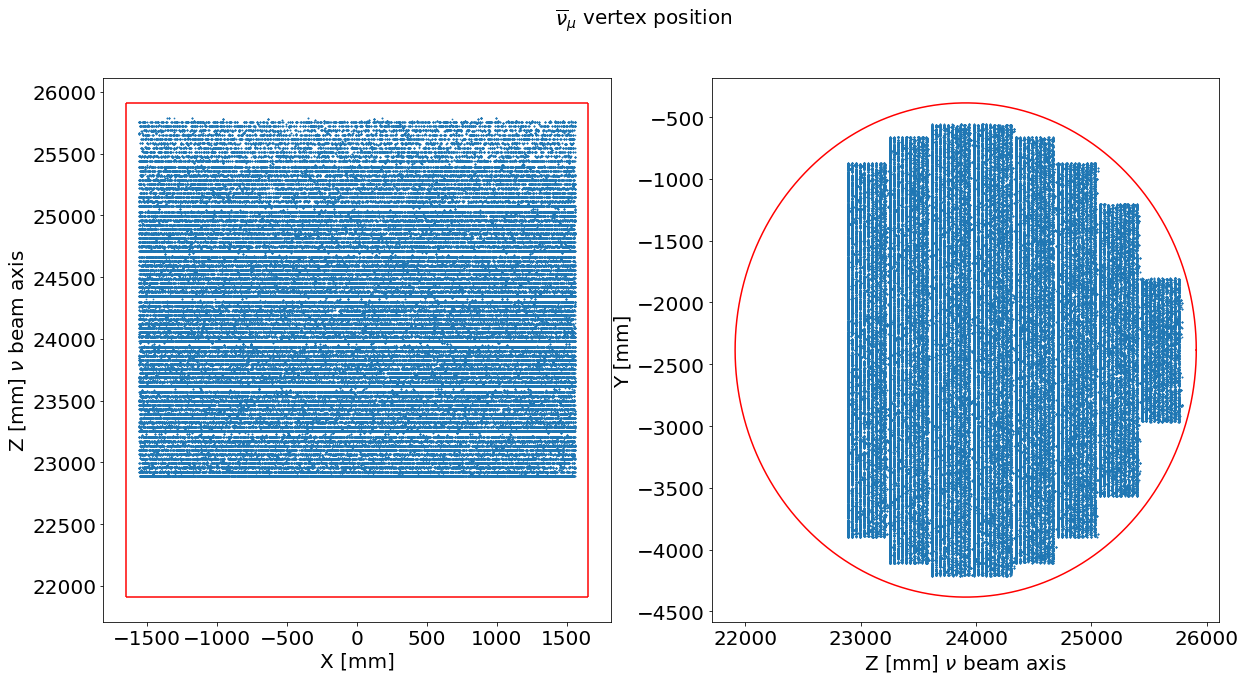

In [25]:
sand_center = [0, -2384.73, 23910]
sand_radius = 2000
theta = np.linspace(0, 2*np.pi, 100000)
z_sand = sand_center[2] + sand_radius * np.cos(theta)
y_sand = sand_center[1] + sand_radius * np.sin(theta)

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].scatter(x = df["Interaction_vtxX"]*1e3, y = df["Interaction_vtxZ"]*1e3, s = 0.5)
ax[1].scatter(x = df["Interaction_vtxZ"]*1e3, y = df["Interaction_vtxY"]*1e3, s = 0.5)

ax[0].vlines(-1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red', label='SAND')
ax[0].vlines(+1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red')
ax[0].hlines(sand_center[2] - sand_radius, -1650, 1650, color='red')
ax[0].hlines(sand_center[2] + sand_radius, -1650, 1650, color='red')
ax[1].plot(z_sand, y_sand, linestyle='-', color='red', label = 'SAND')

ax[0].set_xlabel("X [mm]", fontsize=20)
ax[0].set_ylabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[0].tick_params(labelsize=20)
ax[1].set_xlabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[1].set_ylabel("Y [mm]", fontsize=20)
ax[1].tick_params(labelsize=20)

plt.suptitle(r"$\overline{\nu}_\mu$ vertex position", fontsize=20)

2. momentum conservation (do I really understand genie output)

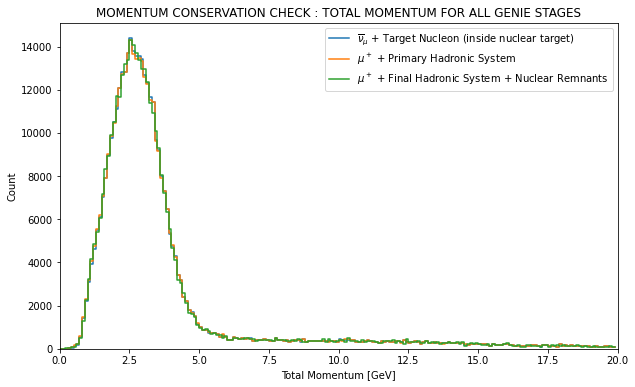

In [26]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.histplot(data=df, x='InitialState_Ptot', bins=np.arange(0,20,0.1), label=r'$\overline{\nu}_\mu$ + Target Nucleon (inside nuclear target)', ax=ax, element='step', fill=False)
sns.histplot(data=df, x='PrimaryState_Ptot', bins=np.arange(0,20,0.1),label=r'$\mu^+$ + Primary Hadronic System', ax=ax, element='step', fill=False)
sns.histplot(data=df, x='FinalState_Ptot', bins=np.arange(0,20,0.1), label=r'$\mu^+$ + Final Hadronic System + Nuclear Remnants', ax=ax, element='step', fill=False)


plt.title("MOMENTUM CONSERVATION CHECK : TOTAL MOMENTUM FOR ALL GENIE STAGES")
plt.xlabel("Total Momentum [GeV]")
plt.xlim([0,20])
plt.legend()

All CCQE on Hydrogen are expected to have:
- target: proton 
- primary hadronic system = final hadronic system = 1 neutron 

Text(0.5, 0.98, 'CCQE events on H')

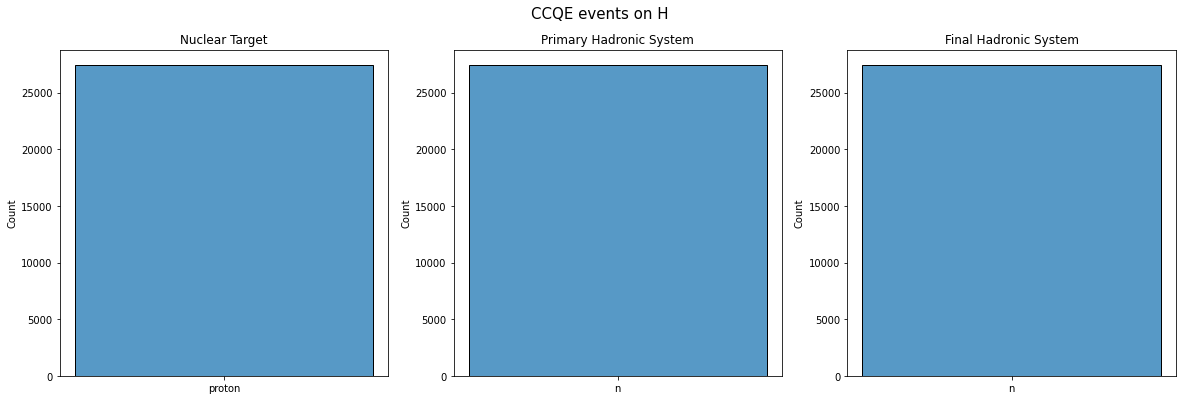

In [27]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.histplot(df[df['CCQEonHydrogen']==1].NuclearTarget, ax=ax[0])
sns.histplot(df[df['CCQEonHydrogen']==1].PrimaryStateHadronicSystemTopology_name, ax=ax[1])
sns.histplot(df[df['CCQEonHydrogen']==1].FinalStateHadronicSystemTopology_name, ax=ax[2])

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")

ax[0].set_title("Nuclear Target")
ax[1].set_title("Primary Hadronic System")
ax[2].set_title("Final Hadronic System")

plt.suptitle("CCQE events on H", fontsize=15)

Expected statistics of events in C and C3H6: does it scale with the mass of the targets?

In [28]:
df.groupby(['InteractionTargetFromGEO']).size()

InteractionTargetFromGEO
C3H6        300172
Gold          6249
Graphite     60920
Mylar         7845
driftGas      3567
dtype: int64

In [53]:
ratio_C3H6_Graphite = 300172/60920
ratio_C3H6_Graphite

4.92731451083388

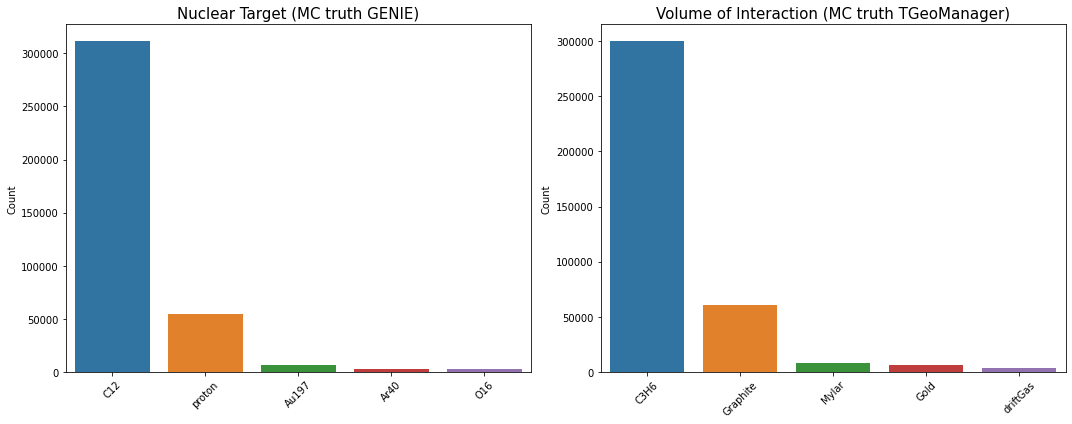

In [30]:
interaction_target_counts = df['NuclearTarget'].value_counts().sort_values(ascending=False)
interaction_target_geo_counts = df['InteractionTargetFromGEO'].value_counts().sort_values(ascending=False)

# Crea un nuovo DataFrame ordinato per il grafico
df_sorted_interaction_target = interaction_target_counts.reset_index()
df_sorted_interaction_target.columns = ['InteractionTarget', 'Count']

df_sorted_interaction_target_geo = interaction_target_geo_counts.reset_index()
df_sorted_interaction_target_geo.columns = ['InteractionTargetFromGEO', 'Count']

# Grafica gli istogrammi ordinati
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='InteractionTarget', y='Count', data=df_sorted_interaction_target, ax=ax[0])
ax[0].set_title('Nuclear Target (MC truth GENIE)', fontsize=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='InteractionTargetFromGEO', y='Count', data=df_sorted_interaction_target_geo, ax=ax[1])
ax[1].set_title('Volume of Interaction (MC truth TGeoManager)', fontsize=15)
ax[1].set_xlabel('')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [61]:
df_sorted_interaction_target

,InteractionTarget,Count
0,C12,311685
1,proton,55008
2,Au197,6249
3,Ar40,3092
4,O16,2719


In [62]:
ratio_C12_H = 311685 / 55008
ratio_C12_H

5.6661758289703315

# Topology

In [31]:
order = ["n", "p", 'n + pi+', 'n + pi-', 'n + pi0', 'p + pi+', 'p + pi-', 'p + pi0', 'no particles', 'Other']

Text(0.5, 1.0, 'GENIE $\\overline{\\nu}_\\mu$ CC Primary Hadronic System')

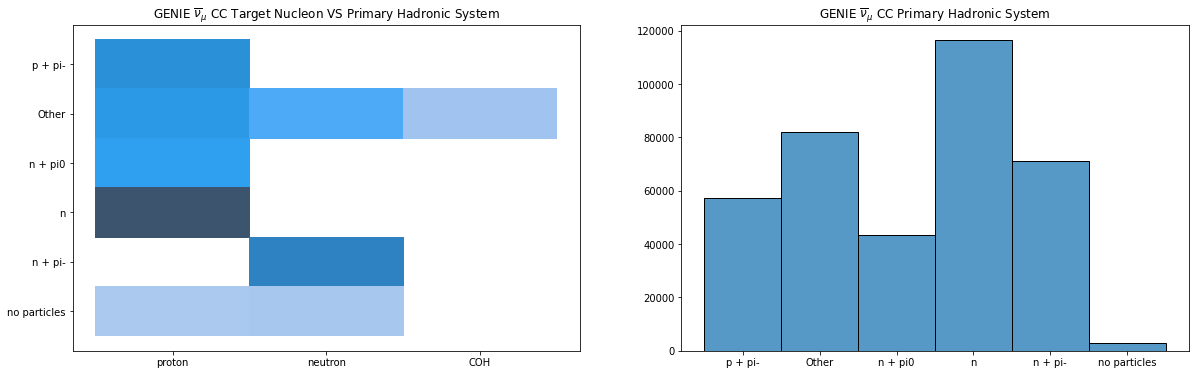

In [32]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

sns.histplot(data=df, x = 'Nucleo_target', y = 'PrimaryStateHadronicSystemTopology_name', ax=ax[0])
sns.histplot(data=df[df.EventType!='COH'], x = 'PrimaryStateHadronicSystemTopology_name', ax=ax[1])

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title(r'GENIE $\overline{\nu}_\mu$ CC Target Nucleon VS Primary Hadronic System')

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(r'GENIE $\overline{\nu}_\mu$ CC Primary Hadronic System')

<AxesSubplot:xlabel='FinalStateHadronicSystemTopology_name', ylabel='Count'>

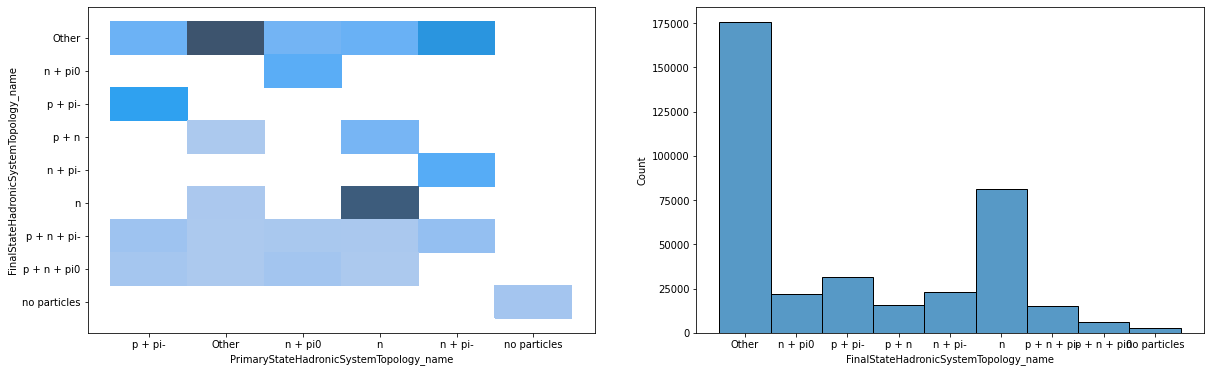

In [33]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

sns.histplot(data=df, x = 'PrimaryStateHadronicSystemTopology_name', y = 'FinalStateHadronicSystemTopology_name', ax=ax[0])
sns.histplot(data=df[df.EventType!='COH'], x = 'FinalStateHadronicSystemTopology_name', ax=ax[1])

# Kinematics

Text(0.5, 1.0, 'Nucleon initial Energy')

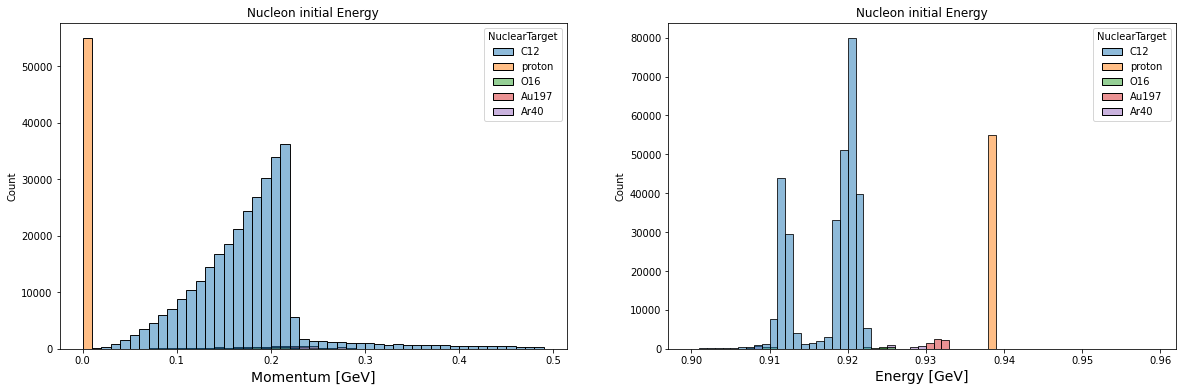

In [34]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.histplot(data=nucleon_target, x='Ptot', hue='NuclearTarget', ax = ax[0],  bins = np.arange(0,0.5,0.01))
sns.histplot(data=nucleon_target, x='E', hue='NuclearTarget', ax = ax[1], bins = np.arange(0.9,0.96,0.001))

ax[0].set_xlabel("Momentum [GeV]", fontsize=14)
ax[0].set_title("Nucleon initial Energy")

ax[1].set_xlabel("Energy [GeV]", fontsize=14)
ax[1].set_title("Nucleon initial Energy")

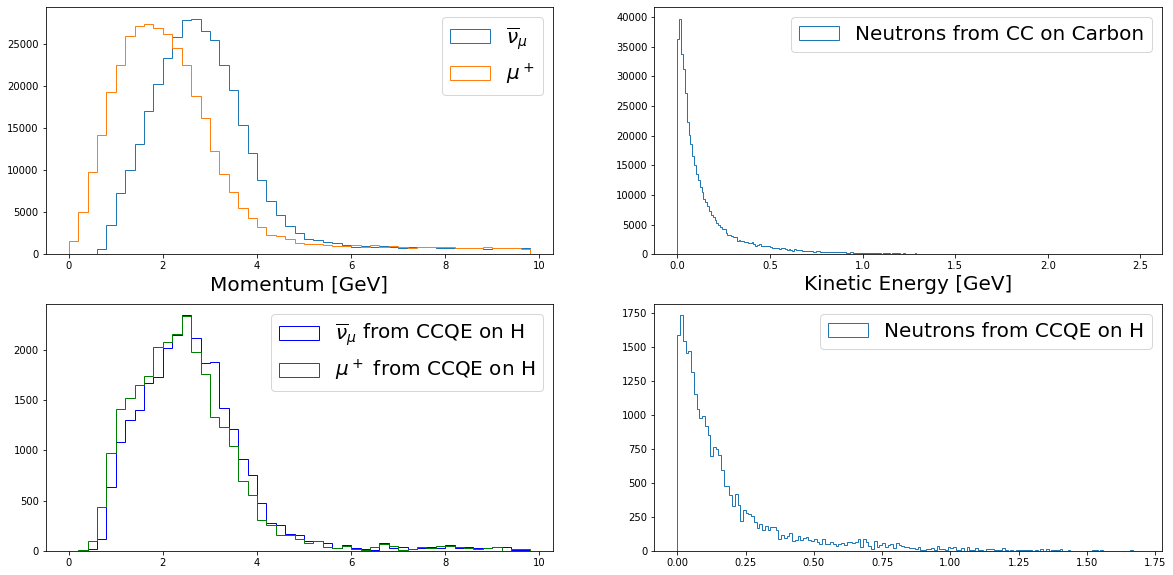

In [35]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0,0].hist(x = incoming_neutrino['Ptot'], 
             bins = np.arange(0,10,0.2), histtype='step', label = r'$\overline{\nu}_\mu$')

ax[0,0].hist(x = FinalStateLepton['Ptot'], 
             bins = np.arange(0,10,0.2), histtype='step', label = r'$\mu^+$')

ax[0,1].hist(x = FinalStateHadronic.loc[(slice(None),slice(None),slice(None),"C12",slice(None),slice(None),'neutron'),:]['E_kin'].values,
             bins=np.arange(0,2.5,0.01), histtype='step', label = "Neutrons from CC on Carbon")

ax[1,0].hist(x = incoming_neutrino.loc[(slice(None),slice(None),slice(None),slice(None),1,slice(None),slice(None)),:]['Ptot'], 
             bins = np.arange(0,10,0.2), histtype='step', color = 'blue', label = r'$\overline{\nu}_\mu$ from CCQE on H')

ax[1,0].hist(x = FinalStateLepton[FinalStateLepton.CCQEonHydrogen==1]['Ptot'], 
             bins = np.arange(0,10,0.2), histtype='step', color = 'green', label = r'$\mu^+$ from CCQE on H')

ax[1,1].hist(x = FinalStateHadronic.loc[(slice(None),slice(None),slice(None),slice(None),1,slice(None),'neutron'),:]['E_kin'].values,
            bins=np.arange(0,1.7,0.01), histtype='step', label = "Neutrons from CCQE on H")

ax[0,0].set_xlabel("Momentum [GeV]", fontsize=20)
ax[0,0].legend(fontsize=20)

ax[0,1].set_xlabel("Kinetic Energy [GeV]", fontsize=20)
ax[0,1].legend(fontsize=20)

ax[1,0].legend(fontsize=20)

ax[1,1].legend(fontsize=20)

In [39]:
incoming_neutrino.loc[(slice(None),slice(None),slice(None),slice(None),1,slice(None),slice(None)),:]

,,,,,,,Px,Py,Pz,E,EmissionAngle,Ptot
EvtNum,entry,EventType,NuclearTarget,CCQEonHydrogen,subentry,name,,,,,,
19,8,QES,proton,1,neutrino,nu_mu_bar,-0.002281,-0.100249,0.994228,0.999272,1.490116e-08,0.999272
254,90,QES,proton,1,neutrino,nu_mu_bar,-0.001255,-0.214912,2.210946,2.221367,0.000000e+00,2.221367
259,92,QES,proton,1,neutrino,nu_mu_bar,-0.005992,-0.309830,3.010981,3.026885,0.000000e+00,3.026885
306,116,QES,proton,1,neutrino,nu_mu_bar,-0.005203,-0.104934,1.056355,1.061567,0.000000e+00,1.061567
310,117,QES,proton,1,neutrino,nu_mu_bar,0.004188,-0.236201,2.268253,2.280522,0.000000e+00,2.280522
...,...,...,...,...,...,...,...,...,...,...,...,...
882,21453,QES,proton,1,neutrino,nu_mu_bar,0.002786,-0.246004,2.413186,2.425694,0.000000e+00,2.425694
901,21461,QES,proton,1,neutrino,nu_mu_bar,0.002330,-0.183948,1.779647,1.789130,0.000000e+00,1.789130
924,21467,QES,proton,1,neutrino,nu_mu_bar,-0.004190,-0.199290,1.991308,2.001260,0.000000e+00,2.001260


In [40]:
FinalStateHadronic.loc[(slice(None),slice(None),slice(None),slice(None),1,slice(None),'neutron'),:]['E_kin']

EvtNum  entry  EventType  NuclearTarget  CCQEonHydrogen  subentry  name   
19      8      QES        proton         1               0         neutron    0.010780
254     90     QES        proton         1               0         neutron    0.265784
259     92     QES        proton         1               0         neutron    0.442151
306     116    QES        proton         1               0         neutron    0.073047
310     117    QES        proton         1               0         neutron    0.076613
                                                                                ...   
882     21453  QES        proton         1               0         neutron    0.100307
901     21461  QES        proton         1               0         neutron    0.141597
924     21467  QES        proton         1               0         neutron    0.211984
927     21468  QES        proton         1               0         neutron    0.184555
984     21488  QES        proton         1             

In [41]:
FinalStateLepton

,EvtNum,EventType,NuclearTarget,CCQEonHydrogen,PDG,Name,Px,Py,Pz,E,EmissionAngle,Ptot
0,3,RES,C12,0,-13,mu+,0.220302,-0.451049,0.681598,0.853064,0.544877,0.846495
1,5,RES,C12,0,-13,mu+,0.111159,-0.835353,2.344333,2.493438,0.243445,2.491198
2,7,QES,Ar40,0,-13,mu+,-0.269246,-0.906659,3.202001,3.340433,0.190270,3.338762
3,8,DIS,C12,0,-13,mu+,0.002229,-0.082638,1.211138,1.218545,0.033613,1.213956
4,9,RES,C12,0,-13,mu+,-0.156078,0.025262,0.859641,0.880423,0.222449,0.874060
...,...,...,...,...,...,...,...,...,...,...,...,...
21492,992,QES,C12,0,-13,mu+,0.084554,0.215380,1.975697,1.992004,0.213902,1.989200
21493,993,DIS,C12,0,-13,mu+,-0.252259,0.129492,3.015427,3.030572,0.166176,3.028729
21494,994,RES,C12,0,-13,mu+,0.354854,0.017416,1.403311,1.451437,0.274027,1.447586
21495,995,RES,C12,0,-13,mu+,-0.372883,0.171678,1.176669,1.250691,0.390808,1.246220


(array([3.20000e+01, 1.20000e+02, 2.53000e+02, 3.55000e+02, 7.22000e+02,
        1.32400e+03, 3.84900e+03, 2.73190e+04, 2.15120e+05, 1.29659e+05]),
 array([0.08708659, 0.18644453, 0.28580248, 0.38516043, 0.48451837,
        0.58387632, 0.68323426, 0.78259221, 0.88195015, 0.9813081 ,
        1.08066604]),
 <BarContainer object of 10 artists>)

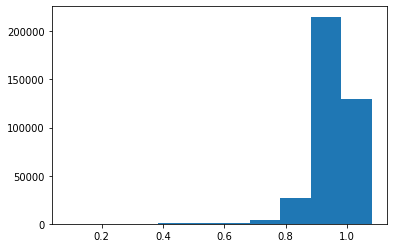

In [36]:
plt.hist(df['FinalStateHadronicSystemTotalKinE'].values / incoming_neutrino['E'].values + FinalStateLepton['E'].values / incoming_neutrino['E'].values)

In [44]:
FinalStateLepton['Fraction_Enu'] = FinalStateLepton['E'].values / incoming_neutrino['E'].values
FinalStateLepton

,EvtNum,EventType,NuclearTarget,CCQEonHydrogen,PDG,Name,Px,Py,Pz,E,EmissionAngle,Ptot,Fraction_Enu
0,3,RES,C12,0,-13,mu+,0.220302,-0.451049,0.681598,0.853064,0.544877,0.846495,0.410607
1,5,RES,C12,0,-13,mu+,0.111159,-0.835353,2.344333,2.493438,0.243445,2.491198,0.765291
2,7,QES,Ar40,0,-13,mu+,-0.269246,-0.906659,3.202001,3.340433,0.190270,3.338762,0.937990
3,8,DIS,C12,0,-13,mu+,0.002229,-0.082638,1.211138,1.218545,0.033613,1.213956,0.392504
4,9,RES,C12,0,-13,mu+,-0.156078,0.025262,0.859641,0.880423,0.222449,0.874060,0.556734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21492,992,QES,C12,0,-13,mu+,0.084554,0.215380,1.975697,1.992004,0.213902,1.989200,0.933389
21493,993,DIS,C12,0,-13,mu+,-0.252259,0.129492,3.015427,3.030572,0.166176,3.028729,0.859491
21494,994,RES,C12,0,-13,mu+,0.354854,0.017416,1.403311,1.451437,0.274027,1.447586,0.685342
21495,995,RES,C12,0,-13,mu+,-0.372883,0.171678,1.176669,1.250691,0.390808,1.246220,0.662883


TESTS

In [39]:
DF = tree.arrays([
 'EvtNum',
 'InteractionTarget',
 'InteractionTargetFromGEO',
 'EventType',
 'CCQEonHydrogen',
 'FinalStateLeptonTransverseP',
 'FinalStateHadronicSystemTransverseP',
 'MissingTransverseMomentum',
 'RmH',
 'DoubleTransverseMomentumImbalance',
 'ExpectedNeutrinoP4FromMuon',
 'ExpectedHadronSystP3',
 'ExpectedHadronSystEnergy',
 ],library='pd').rename(columns = new_columns)


new_columns = {
            (                               'EvtNum',   '',   ''): "EvtNum",
            (                    'InteractionTarget',   '',   ''): "InteractionTarget",
            (             'InteractionTargetFromGEO',   '',   ''): "InteractionTargetFromGEO",
            (                            'EventType',   '',   ''): "EventType",
            (                       'CCQEonHydrogen',   '',   ''): "CCQEonHydrogen",
            (        'FinalStateLeptonTransversePfX',   '',   ''): "FSLeptonTransversePx",
            (        'FinalStateLeptonTransversePfY',   '',   ''): "FSLeptonTransversePy",
            (        'FinalStateLeptonTransversePfZ',   '',   ''): "FSLeptonTransversePz",
            ('FinalStateHadronicSystemTransversePfX',   '',   ''): "FSHadrSystTransversePx",
            ('FinalStateHadronicSystemTransversePfY',   '',   ''): "FSHadrSystTransversePy",
            ('FinalStateHadronicSystemTransversePfZ',   '',   ''): "FSHadrSystTransversePz",
            (            'MissingTransverseMomentum',   '',   ''): "MissingTransverseMomentum",
            (                                  'RmH',   '',   ''): "RmH",
            (    'DoubleTransverseMomentumImbalance',   '',   ''): "DoubleTransverseMomentumImbalance",
            (          'ExpectedNeutrinoP4FromMuon', 'fP', 'fX') : "ExpectedNeutrinoPx",
            (          'ExpectedNeutrinoP4FromMuon', 'fP', 'fY') : "ExpectedNeutrinoPy",
            (          'ExpectedNeutrinoP4FromMuon', 'fP', 'fZ') : "ExpectedNeutrinoPz",
            (          'ExpectedNeutrinoP4FromMuon', 'fE',   '') : "ExpectedNeutrinoE",
            (              'ExpectedHadronSystP3fX',   '',   '') : "ExpectedHadronSystPx",
            (              'ExpectedHadronSystP3fY',   '',   '') : "ExpectedHadronSystPy",
            (              'ExpectedHadronSystP3fZ',   '',   '') : "ExpectedHadronSystPz",
            (    'ExpectedHadronSystEnergy',   '',   ''):          "ExpectedHadronSystEnergy",
}

# Appiattire il MultiIndex delle colonne
DF.columns = ['_'.join(filter(None, col)).strip() for col in DF.columns.values]

# Creare un dizionario di mappatura per le nuove colonne appiattite
flat_new_columns = {'_'.join(filter(None, k)).strip(): v for k, v in new_columns.items()}

# Rinomina le colonne usando il dizionario di mappatura
DF.rename(columns=flat_new_columns, inplace=True)

# test['FinalStateTransversePtot'] = np.sqrt(test['FinalStateTransversePfX']**2+test['FinalStateTransversePfY']**2+test['FinalStateTransversePfZ']**2)
DF

,EvtNum,InteractionTarget,InteractionTargetFromGEO,EventType,CCQEonHydrogen,FSLeptonTransversePx,FSLeptonTransversePy,FSLeptonTransversePz,FSHadrSystTransversePx,FSHadrSystTransversePy,...,RmH,DoubleTransverseMomentumImbalance,ExpectedNeutrinoPx,ExpectedNeutrinoPy,ExpectedNeutrinoPz,ExpectedNeutrinoE,ExpectedHadronSystPx,ExpectedHadronSystPy,ExpectedHadronSystPz,ExpectedHadronSystEnergy
0,3,C12,Graphite,RES,0,-1.089497,-1.141150,-0.117042,0.700476,1.094077,...,-0.537825,-2.494945e-01,0.002155,-0.742926,7.223393,7.261497,1.090108,0.930316,2.166960,2.762667
1,4,C12,C3H6,DIS,0,0.438670,0.338597,0.033269,-0.403290,-0.412133,...,-0.751651,-8.010154e-02,0.003688,-0.125263,1.226236,1.232623,-0.437488,-0.378766,0.359966,1.160701
2,7,C12,Graphite,RES,0,-0.510164,-0.217718,-0.024736,0.448434,0.333028,...,-0.619984,-1.308453e-01,-0.011502,-0.258147,2.509332,2.522601,0.509020,0.192054,0.274203,1.119806
3,9,proton,C3H6,DIS,0,0.203561,0.299422,0.031703,-0.203561,-0.299422,...,-1.000000,-5.551115e-17,-0.004808,-0.244404,2.339190,2.351928,-0.203779,-0.310482,0.074149,1.013022
4,10,C12,C3H6,DIS,0,0.353814,0.059955,0.005649,-0.729600,-0.095926,...,-0.321897,2.745618e-02,0.002825,-0.228231,2.245554,2.257124,-0.353682,-0.070602,0.099105,1.011281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378748,987,C12,C3H6,DIS,0,0.302139,-0.160836,-0.014864,-0.357041,0.015700,...,-0.392740,-1.544942e-01,-0.003323,-0.123762,1.271666,1.277678,-0.302461,0.148836,0.138158,1.007727
378749,993,proton,C3H6,QES,1,-0.425559,-0.125292,-0.011280,0.425559,0.125292,...,-1.000000,3.469447e-18,0.008995,-0.279553,2.765775,2.779882,0.426047,0.110104,0.161540,1.050012
378750,994,C12,C3H6,DIS,0,0.601595,0.369419,0.038214,-0.783491,-0.407559,...,-0.652551,6.291662e-02,-0.005800,-0.857884,8.384521,8.428297,-0.601807,-0.400860,0.269070,1.215751
378751,998,C12,C3H6,DIS,0,0.124970,-0.447571,-0.044343,-0.153482,0.241684,...,-0.158116,-8.286044e-02,-0.000217,-0.256301,2.586337,2.599006,-0.124984,0.430655,0.215039,1.063070


In [40]:
DF_CCQE_h = DF[DF.CCQEonHydrogen==1]

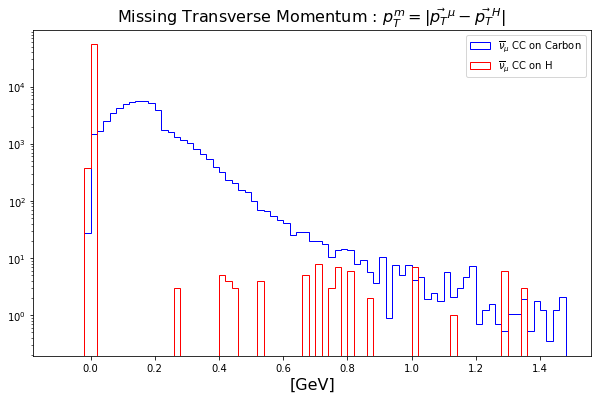

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(x=DF[DF.InteractionTarget=='C12']['MissingTransverseMomentum'], 
         bins=np.arange(-0.1,1.5,0.02), weights=np.array([1/ratio_C12_H for i in range(len(DF[DF.InteractionTarget=='C12']['MissingTransverseMomentum']))]),
         histtype='step', color = 'blue', label=r'$\overline{\nu}_\mu$ CC on Carbon')

plt.hist(x=DF[DF.InteractionTarget=='proton']['MissingTransverseMomentum'], 
         bins=np.arange(-0.1,1.5,0.02), 
         histtype='step', color = 'red', label=r'$\overline{\nu}_\mu$ CC on H')

plt.legend()

plt.title(r"Missing Transverse Momentum : $p_T^m = |\vec{p_T}^\mu - \vec{p_T}^H|$", fontsize=16)
plt.xlabel("[GeV]", fontsize=16)

plt.yscale("log")

Text(0.5, 0, '$R_{mH}$')

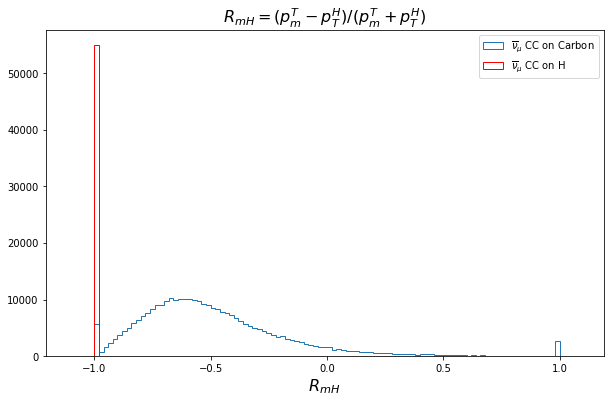

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

# plt.hist(x=test['RmH'], bins=np.arange(-1.1,1.1,0.02), histtype='step', label = "All")
plt.hist(x=DF[DF.InteractionTarget=='C12']['RmH'], 
         bins=np.arange(-1.1,1.1,0.02), 
         histtype='step', label=r'$\overline{\nu}_\mu$ CC on Carbon')

plt.hist(x=DF[DF.InteractionTarget=='proton']['RmH'], 
         bins=np.arange(-1.1,1.1,0.02), 
         color='red', histtype='step', label=r'$\overline{\nu}_\mu$ CC on H')
plt.legend()

plt.title(r"$R_{mH}=(p_m^T - p_T^H)/(p_m^T + p_T^H)$", fontsize=16)
plt.xlabel(r"$R_{mH}$", fontsize=16)

Text(0.5, 0, '$\\delta p_{TT}$ [Gev]')

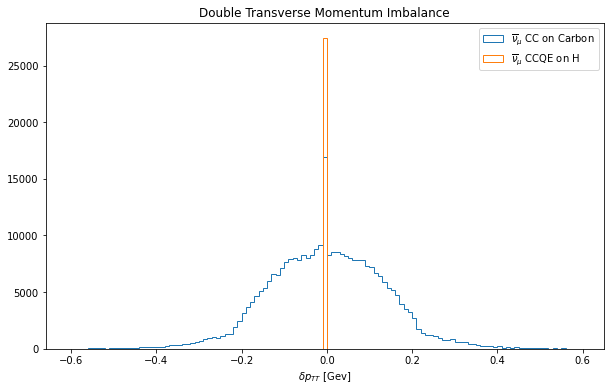

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(x = DF[DF.InteractionTarget=='C12']['DoubleTransverseMomentumImbalance'], bins=np.arange(-0.6, 0.6, 0.01), histtype='step', label=r'$\overline{\nu}_\mu$ CC on Carbon')
plt.hist(x = DF[DF.CCQEonHydrogen==1]['DoubleTransverseMomentumImbalance'], bins=np.arange(-0.6, 0.6, 0.01), histtype='step', label=r'$\overline{\nu}_\mu$ CCQE on H')

plt.legend()
plt.title("Double Transverse Momentum Imbalance")
plt.xlabel(r'$\delta p_{TT}$ [Gev]')

In [44]:
neutron_mass = 0.939565420
proton_mass = 0.938272089
muon_mass = 0.105658376

neutron_mass2 = neutron_mass*neutron_mass
proton_mass2 = proton_mass*proton_mass
muon_mass2 = muon_mass*muon_mass

c = 1

def NuEFromMu(ptot, E, angle):
    # print(f'numeratore : {(neutron_mass2 - proton_mass2 - muon_mass2 - 2*E*muon_mass)}')
    # print(f'denominatore : {(2*(proton_mass - E + ptot*c*np.cos(angle)))}')
    # print(f'cos(angle) : {np.cos(angle)}')
    return (neutron_mass2 - proton_mass2 - muon_mass2 + 2*E*proton_mass)/(2*(proton_mass - E + ptot * c * np.cos(angle)))

In [45]:
FinalStateLepton['Ptot'] = np.sqrt(FinalStateLepton.Px**2 + FinalStateLepton.Py**2 + FinalStateLepton.Pz**2)

In [46]:
nu_recoE = FinalStateLepton[FinalStateLepton['CCQEonHydrogen']==1].apply(lambda row : NuEFromMu(row['Ptot'], row['E'], row['EmissionAngle']), axis=1)
nu_recoE

27        1.281684
64        2.976562
103       1.503593
107       2.539124
117       3.736264
            ...   
378692    2.499602
378733    2.971819
378734    1.877357
378737    2.847877
378749    2.779875
Length: 27420, dtype: float64

In [47]:
neutron_recoE = nu_recoE.values + proton_mass - FinalStateLepton[FinalStateLepton['CCQEonHydrogen']==1]['E'].values
neutron_recoE

array([1.1819739 , 0.94385736, 1.32415108, ..., 1.04787204, 1.26770817,
       1.05000747])

In [48]:
incoming_neutrino_signal =  incoming_neutrino.loc[(slice(None),slice(None),slice(None),slice(None),1,slice(None),slice(None)),:]
incoming_neutrino_signal

,,,,,,,Px,Py,Pz,E,EmissionAngle,Ptot
EvtNum,entry,EventType,NuclearTarget,CCQEonHydrogen,subentry,name,,,,,,
53,27,QES,proton,1,neutrino,nu_mu_bar,0.000961,-0.124413,1.275631,1.281684,0.000000e+00,1.281684
152,64,QES,proton,1,neutrino,nu_mu_bar,-0.002373,-0.294813,2.961925,2.976562,0.000000e+00,2.976562
249,103,QES,proton,1,neutrino,nu_mu_bar,-0.004538,-0.157301,1.495335,1.503593,0.000000e+00,1.503593
262,107,QES,proton,1,neutrino,nu_mu_bar,0.002195,-0.257874,2.525994,2.539124,0.000000e+00,2.539124
285,117,QES,proton,1,neutrino,nu_mu_bar,-0.003675,-0.378103,3.717081,3.736264,0.000000e+00,3.736264
...,...,...,...,...,...,...,...,...,...,...,...,...
836,378692,QES,proton,1,neutrino,nu_mu_bar,-0.005058,-0.253759,2.486682,2.499602,2.107342e-08,2.499602
948,378733,QES,proton,1,neutrino,nu_mu_bar,0.004904,-0.295191,2.957118,2.971819,1.490116e-08,2.971819
949,378734,QES,proton,1,neutrino,nu_mu_bar,-0.001112,-0.194423,1.867262,1.877357,0.000000e+00,1.877357


Text(0.5, 0, 'E [GeV]')

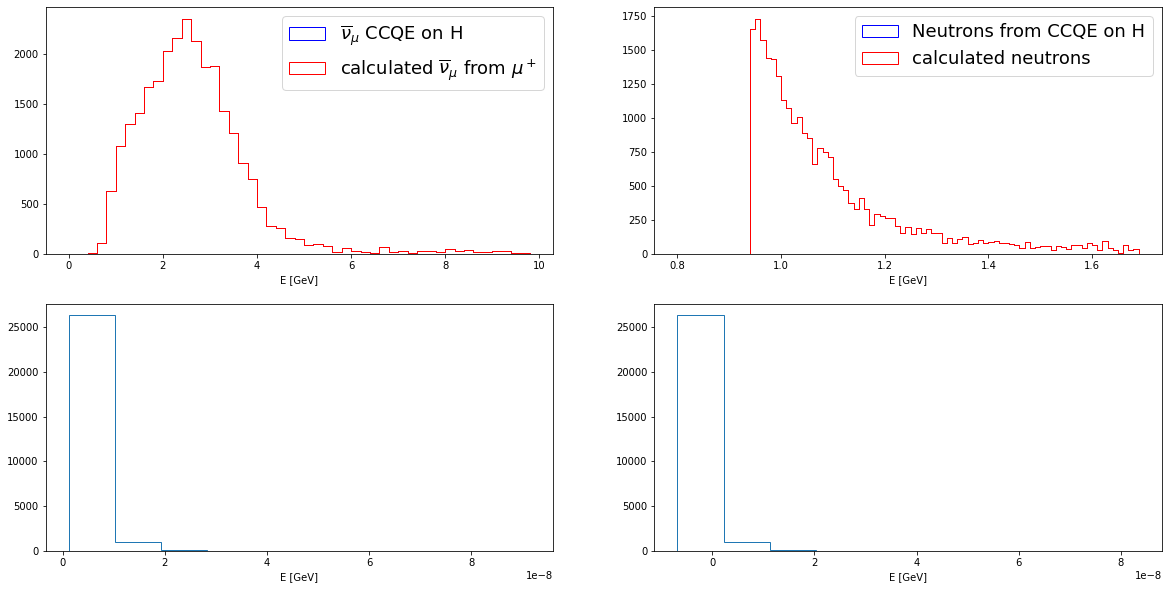

In [49]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0,0].hist(incoming_neutrino_signal['E'], bins = np.arange(0,10,0.2), histtype='step', color = 'blue', label = r'$\overline{\nu}_\mu$ CCQE on H')
# ax[0,0].hist(DF_CCQE_h['EstimatedNeutrinoE'], bins = np.arange(0,10,0.2), histtype='step', color = 'red', label = r'calculated $\overline{\nu}_\mu$ from $\mu^+$')
ax[0,0].hist(nu_recoE, bins = np.arange(0,10,0.2), histtype='step', color = 'red', label = r'calculated $\overline{\nu}_\mu$ from $\mu^+$')

ax[1,0].hist(incoming_neutrino_signal['E'].values - nu_recoE, histtype='step')

ax[0,1].hist(FinalStateHadronic_CCQE_h['E'], bins=np.arange(0.8,1.7,0.01), histtype='step', color = 'blue', label = "Neutrons from CCQE on H")
# ax[0,1].hist(DF_CCQE_h['EstimatedHadronSystEnergy'], bins=np.arange(0.8,1.7,0.01), histtype='step', color = 'red',label = "calculated neutrons")
ax[0,1].hist(neutron_recoE, bins=np.arange(0.8,1.7,0.01), histtype='step', color = 'red',label = "calculated neutrons")

ax[1,1].hist(FinalStateHadronic_CCQE_h['E'].values - neutron_recoE , histtype='step')

ax[0,0].legend(fontsize=18)
ax[0,1].legend(fontsize=18)
ax[0,0].set_xlabel("E [GeV]")
ax[0,1].set_xlabel("E [GeV]")
ax[1,1].set_xlabel("E [GeV]")
ax[1,0].set_xlabel("E [GeV]")

Text(0.5, 0.98, 'Calculated Neutrino Momentum from muon VS True Neutrino Momentum [CCQE on H]')

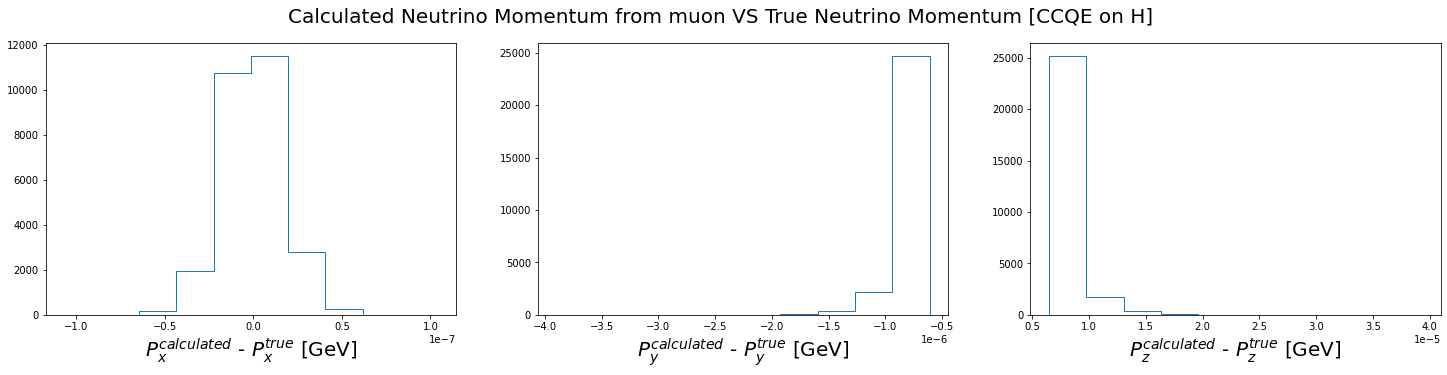

In [51]:
fig, ax = plt.subplots(1,3, figsize=(25,5))

ax[0].hist(DF_CCQE_h.ExpectedNeutrinoPx.values - incoming_neutrino_signal.Px.values, histtype='step')
ax[1].hist(DF_CCQE_h.ExpectedNeutrinoPy.values - incoming_neutrino_signal.Py.values, histtype='step')
ax[2].hist(DF_CCQE_h.ExpectedNeutrinoPz.values - incoming_neutrino_signal.Pz.values, histtype='step')

ax[0].set_xlabel(r"$P_x^{calculated}$ - $P_x^{true}$ [GeV]", fontsize=20)
ax[1].set_xlabel(r"$P_y^{calculated}$ - $P_y^{true}$ [GeV]", fontsize=20)
ax[2].set_xlabel(r"$P_z^{calculated}$ - $P_z^{true}$ [GeV]", fontsize=20)

plt.suptitle("Calculated Neutrino Momentum from muon VS True Neutrino Momentum [CCQE on H]", fontsize=20)


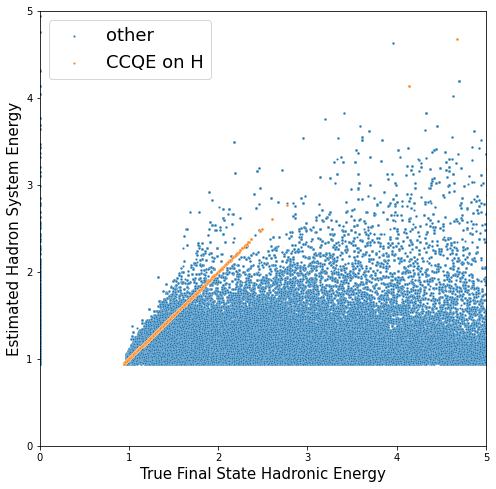

In [52]:
fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(x = df[df.CCQEonHydrogen==0]['FinalHadronic_E'], y = DF[DF.CCQEonHydrogen==0]['ExpectedHadronSystEnergy'].values, s=5, label = "other")
sns.scatterplot(x = FinalStateHadronic_CCQE_h['E'].values, y = DF_CCQE_h['ExpectedHadronSystEnergy'].values, s=5, label = "CCQE on H")

ax.set_xlabel("True Final State Hadronic Energy", fontsize=15)
ax.set_ylabel("Estimated Hadron System Energy", fontsize=15)

plt.xlim(0,5)
plt.ylim(0,5)

plt.legend(fontsize=18)


In [62]:
DF[DF.CCQEonHydrogen==0]

,EvtNum,InteractionTarget,InteractionTargetFromGEO,EventType,CCQEonHydrogen,FSLeptonTransversePx,FSLeptonTransversePy,FSLeptonTransversePz,FSHadrSystTransversePx,FSHadrSystTransversePy,...,RmH,DoubleTransverseMomentumImbalance,EstimatedNeutrinoPx,EstimatedNeutrinoPy,EstimatedNeutrinoPz,EstimatedNeutrinoE,EstimatedHadronSystPx,EstimatedHadronSystPy,EstimatedHadronSystPz,EstimatedHadronSystEnergy
0,3,C12,C3H6,RES,0,0.220567,-0.377313,-0.038552,-0.314354,0.433671,...,-0.661315,-0.052595,-0.000365,-0.101310,0.989443,0.994617,-0.220667,0.349740,0.307846,1.079823
1,5,C12,C3H6,RES,0,0.112487,-0.586746,-0.060592,-0.066400,0.595777,...,-0.855374,0.046973,-0.001493,-0.279411,2.702906,2.717310,-0.112652,0.555942,0.358573,1.162142
2,7,Ar40,driftGas,QES,0,-0.272539,-0.566551,-0.058817,0.138113,0.405075,...,-0.342175,-0.051193,0.003598,-0.371535,3.562131,3.581456,0.272844,0.535123,0.360130,1.179293
3,8,C12,C3H6,DIS,0,0.000063,0.040586,0.004143,0.045605,-0.076856,...,-0.211107,-0.045724,0.002197,-0.124934,1.223747,1.230109,-0.000032,-0.042296,0.012609,0.949834
4,9,C12,C3H6,RES,0,-0.155834,0.112982,0.011643,0.035257,-0.132729,...,-0.060774,0.087066,-0.000260,-0.093860,0.907354,0.912195,0.155817,-0.119122,0.047713,0.970043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21492,992,C12,C3H6,QES,0,0.079481,0.412591,0.041867,-0.079783,-0.429906,...,-0.923787,-0.002980,0.005492,-0.213521,2.093765,2.104631,-0.079061,-0.428901,0.118067,1.050897
21493,993,C12,C3H6,DIS,0,-0.251514,0.431070,0.043683,0.229131,-0.442533,...,-0.904192,0.025143,-0.000794,-0.321367,3.166744,3.183009,0.251465,-0.450859,0.151317,1.090707
21494,994,C12,C3H6,RES,0,0.357086,0.160164,0.017068,-0.330072,-0.205265,...,-0.761244,-0.052433,-0.002485,-0.158953,1.543617,1.551781,-0.357339,-0.176369,0.140306,1.038615
21495,995,C12,Graphite,RES,0,-0.373737,0.291121,0.030620,0.332529,-0.332431,...,-0.779224,0.058105,0.001040,-0.145381,1.394918,1.402474,0.373923,-0.317059,0.218249,1.090052


In [63]:
df[df.CCQEonHydrogen==0]['FinalHadronic_E']

0        3.078363
1        1.686205
2        2.056011
3        2.805984
4        1.622390
           ...   
21492    1.986574
21493    2.332336
21494    2.507454
21495    2.489696
21496    1.853773
Name: FinalHadronic_E, Length: 19927, dtype: float64